<a href="https://colab.research.google.com/github/MathieuForge/Moneyradar/blob/main/dette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

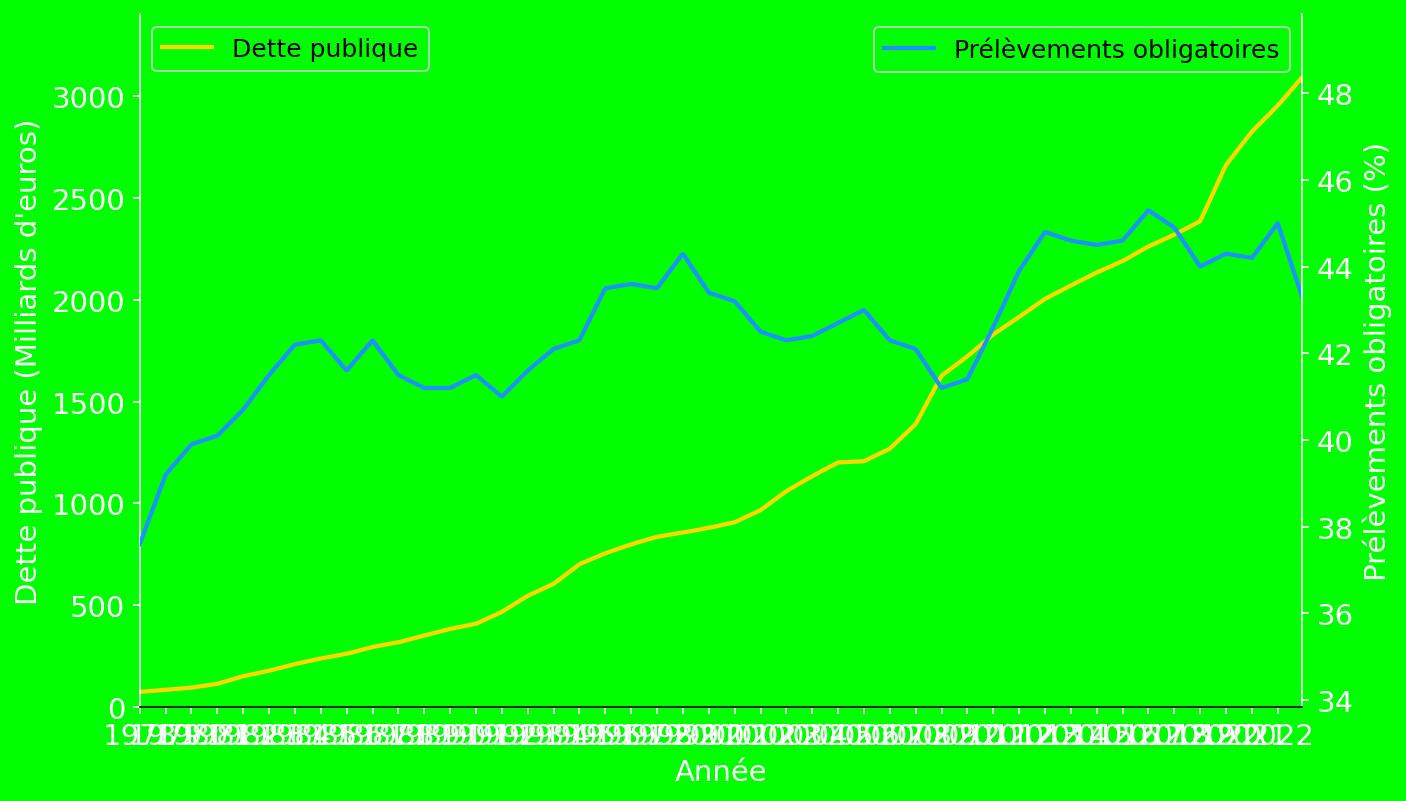

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Données sur la dette publique et les prélèvements obligatoires
data_debt_tax = {
    'Année': [1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
              1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
              2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Dette publique (Milliards d\'euros)': [74.5, 85.1, 95.3, 114.3, 151.8, 178.3, 211.2, 238.8, 261.7, 295.0, 318.2,
                                            351.3, 384.1, 409.0, 467.7, 546.5, 605.0, 701.6, 755.6, 799.4, 836.1, 856.9,
                                            880.0, 907.7, 966.8, 1060.4, 1134.3, 1201.5, 1207.3, 1268.9, 1389.4, 1627.2,
                                            1722.2, 1830.1, 1915.8, 2004.7, 2070.6, 2134.1, 2190.0, 2262.4, 2319.8,
                                            2386.1, 2662.1, 2826.7, 2953.6, 3101.4],
    'Prélèvements obligatoires (%)': [37.6, 39.2, 39.9, 40.1, 40.7, 41.5, 42.2, 42.3, 41.6, 42.3, 41.5, 41.2, 41.2,
                                      41.5, 41.0, 41.6, 42.1, 42.3, 43.5, 43.6, 43.5, 44.3, 43.4, 43.2, 42.5, 42.3,
                                      42.4, 42.7, 43.0, 42.3, 42.1, 41.2, 41.4, 42.6, 43.9, 44.8, 44.6, 44.5, 44.6,
                                      45.3, 44.9, 44.0, 44.3, 44.2, 45.0, 43.2]
}

# Convertir l'année en datetime pour la dette publique
df_debt_tax = pd.DataFrame(data_debt_tax)
df_debt_tax['Date'] = pd.to_datetime(df_debt_tax['Année'].astype(str) + '-01-01')
x_data_debt_tax = df_debt_tax['Date'].values.astype('datetime64[D]')

# Nombre total de frames pour une animation de 15 secondes à 60 images par seconde
total_frames = 15 * 60

# Interpoler les données pour obtenir plus de frames
time_interp = np.linspace(0, len(x_data_debt_tax) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data_debt_tax)), x_data_debt_tax.astype(np.int64)).astype('datetime64[D]')
y_interp_debt = np.interp(time_interp, np.arange(len(df_debt_tax)), df_debt_tax['Dette publique (Milliards d\'euros)'])
y_interp_tax = np.interp(time_interp, np.arange(len(df_debt_tax)), df_debt_tax['Prélèvements obligatoires (%)'])

# Créer la figure et les axes avec une résolution élevée pour éviter la pixellisation
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=150)  # Adapter la taille et la résolution de la figure

# Créer un deuxième axe pour les prélèvements obligatoires
ax2 = ax1.twinx()

# Couleur de fond verte pour la figure et les axes
fig.patch.set_facecolor('#00FF00')
ax1.set_facecolor('#00FF00')
ax2.set_facecolor('#00FF00')

# Supprimer les cadres supérieur et droit pour ax1
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Supprimer les cadres supérieur et gauche pour ax2
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Configurer l'axe des x pour afficher uniquement les années tous les 1 an
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs plus vives
color_debt = '#FFD700'  # Gold
color_tax = '#1E90FF'   # Dodger Blue

# Définir la couleur des axes et des étiquettes en blanc pour ax1
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.tick_params(axis='x', colors='white', labelsize=14)
ax1.tick_params(axis='y', colors='white', labelsize=14)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Définir la couleur des axes et des étiquettes en blanc pour ax2
ax2.spines['right'].set_color('white')
ax2.tick_params(axis='y', colors='white', labelsize=14)
ax2.yaxis.label.set_color('white')

# Créer les lignes de données pour la dette publique et les prélèvements obligatoires
line_debt, = ax1.plot([], [], label='Dette publique', lw=2, color=color_debt, zorder=1)
line_tax, = ax2.plot([], [], label='Prélèvements obligatoires', lw=2, color=color_tax, zorder=1)

# Initialiser la fonction pour la configuration de l'animation
def init():
    line_debt.set_data([], [])
    line_tax.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max())
    ax1.set_ylim(0, max(df_debt_tax['Dette publique (Milliards d\'euros)']) * 0.1)
    ax2.set_ylim(min(df_debt_tax['Prélèvements obligatoires (%)']) * 0.9, max(df_debt_tax['Prélèvements obligatoires (%)']) * 1.1)
    ax1.set_xlabel('Année', fontsize=14)
    ax1.set_ylabel('Dette publique (Milliards d\'euros)', fontsize=14)
    ax2.set_ylabel('Prélèvements obligatoires (%)', fontsize=14)
    ax1.legend(loc='upper left', fontsize=12, facecolor='#00FF00')
    ax2.legend(loc='upper right', fontsize=12, facecolor='#00FF00')
    return line_debt, line_tax,

# Fonction pour mettre à jour l'animation
def update(frame):
    # Mise à jour des données des lignes
    line_debt.set_data(x_interp[:frame], y_interp_debt[:frame])
    line_tax.set_data(x_interp[:frame], y_interp_tax[:frame])

    # Mise à jour des limites des axes si la séquence n'est pas vide
    if frame > 0:
        # Ajuster les limites des y-axes
        ax1.set_ylim(0, max(y_interp_debt[:frame]) * 1.1)
        ax2.set_ylim(min(y_interp_tax[:frame]) * 0.9, max(y_interp_tax[:frame]) * 1.1)

        # Ajuster les limites de l'axe des x pour dézoomer progressivement
        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames))

    return line_debt, line_tax,

# Créer l'animation avec 60 images par seconde (interval=1000/60 millisecondes)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Enregistrer l'animation en tant que fichier vidéo
ani.save('debt_tax_animation.mp4', writer='ffmpeg')

# Afficher l'animation dans le notebook
HTML('<video controls src="debt_tax_animation.mp4" type="video/mp4">')


In [ ]:
df.head()

,Année,Dette publique (Milliards d'euros),Prélèvements obligatoires (%),Year
0,1978,74.5,37.6,1978-01-01
1,1979,85.1,39.2,1979-01-01
2,1980,95.3,39.9,1980-01-01
3,1981,114.3,40.1,1981-01-01
4,1982,151.8,40.7,1982-01-01


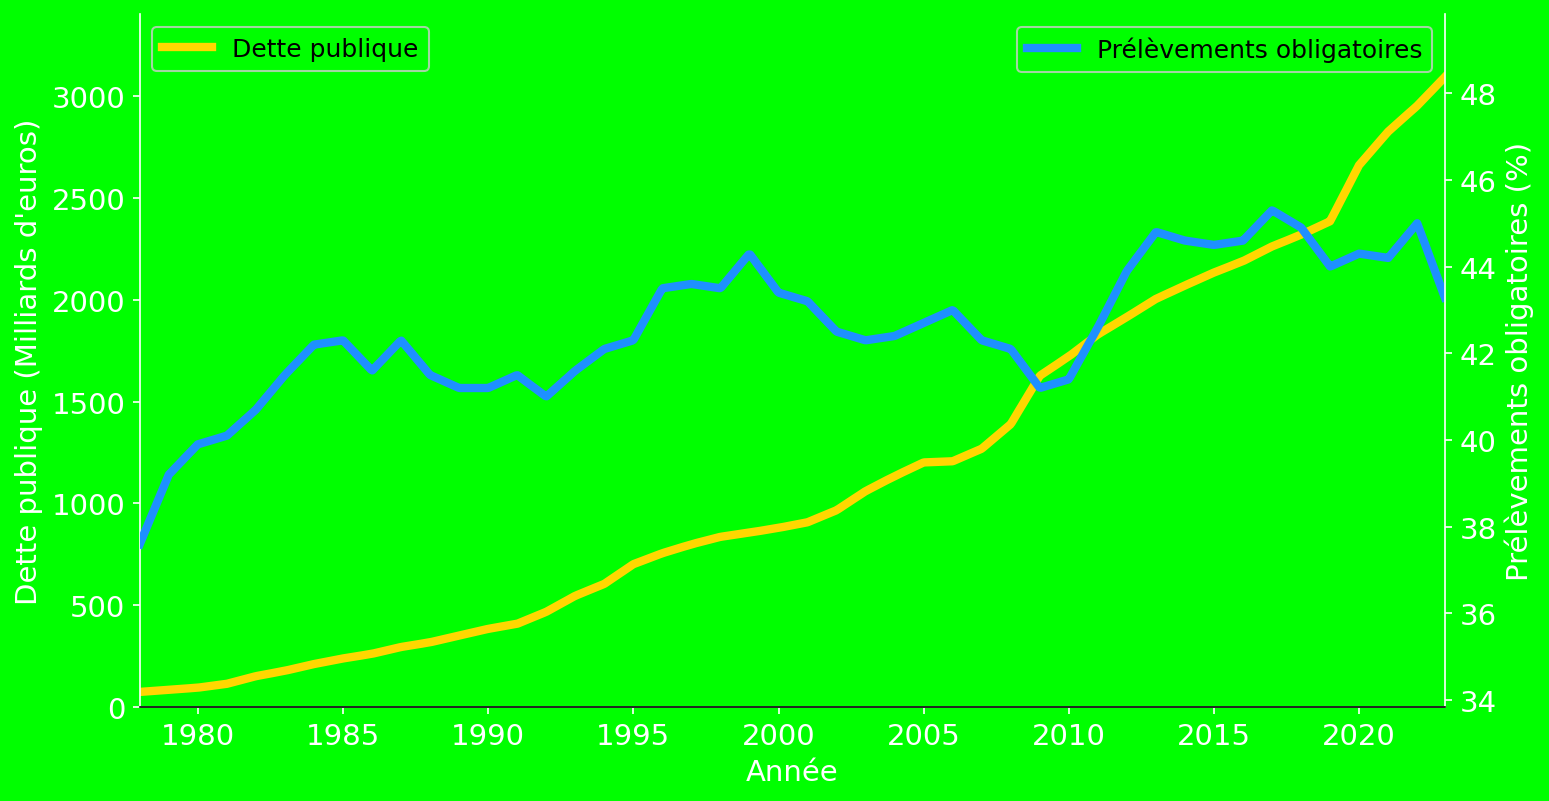

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Données sur la dette publique et les prélèvements obligatoires
data_debt_tax = {
    'Année': [1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
              1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
              2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Dette publique (Milliards d\'euros)': [74.5, 85.1, 95.3, 114.3, 151.8, 178.3, 211.2, 238.8, 261.7, 295.0, 318.2,
                                            351.3, 384.1, 409.0, 467.7, 546.5, 605.0, 701.6, 755.6, 799.4, 836.1, 856.9,
                                            880.0, 907.7, 966.8, 1060.4, 1134.3, 1201.5, 1207.3, 1268.9, 1389.4, 1627.2,
                                            1722.2, 1830.1, 1915.8, 2004.7, 2070.6, 2134.1, 2190.0, 2262.4, 2319.8,
                                            2386.1, 2662.1, 2826.7, 2953.6, 3101.4],
    'Prélèvements obligatoires (%)': [37.6, 39.2, 39.9, 40.1, 40.7, 41.5, 42.2, 42.3, 41.6, 42.3, 41.5, 41.2, 41.2,
                                      41.5, 41.0, 41.6, 42.1, 42.3, 43.5, 43.6, 43.5, 44.3, 43.4, 43.2, 42.5, 42.3,
                                      42.4, 42.7, 43.0, 42.3, 42.1, 41.2, 41.4, 42.6, 43.9, 44.8, 44.6, 44.5, 44.6,
                                      45.3, 44.9, 44.0, 44.3, 44.2, 45.0, 43.2]
}

# Convertir l'année en datetime pour la dette publique
df_debt_tax = pd.DataFrame(data_debt_tax)
df_debt_tax['Date'] = pd.to_datetime(df_debt_tax['Année'].astype(str) + '-01-01')
x_data_debt_tax = df_debt_tax['Date'].values.astype('datetime64[D]')

# Nombre total de frames pour une animation de 15 secondes à 60 images par seconde
total_frames = 15 * 60

# Interpoler les données pour obtenir plus de frames
time_interp = np.linspace(0, len(x_data_debt_tax) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data_debt_tax)), x_data_debt_tax.astype(np.int64)).astype('datetime64[D]')
y_interp_debt = np.interp(time_interp, np.arange(len(df_debt_tax)), df_debt_tax['Dette publique (Milliards d\'euros)'])
y_interp_tax = np.interp(time_interp, np.arange(len(df_debt_tax)), df_debt_tax['Prélèvements obligatoires (%)'])

# Créer la figure et les axes avec une résolution élevée pour éviter la pixellisation
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=150)  # Adapter la taille et la résolution de la figure

# Créer un deuxième axe pour les prélèvements obligatoires
ax2 = ax1.twinx()

# Couleur de fond verte pour la figure et les axes
fig.patch.set_facecolor('#00FF00')
ax1.set_facecolor('#00FF00')
ax2.set_facecolor('#00FF00')

# Supprimer les cadres supérieur et droit pour ax1
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Supprimer les cadres supérieur et gauche pour ax2
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Configurer l'axe des x pour afficher uniquement les années tous les 5 ans
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs plus vives
color_debt = '#FFD700'  # Gold
color_tax = '#1E90FF'   # Dodger Blue

# Définir la couleur des axes et des étiquettes en blanc pour ax1
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.tick_params(axis='x', colors='white', labelsize=14)
ax1.tick_params(axis='y', colors='white', labelsize=14)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Définir la couleur des axes et des étiquettes en blanc pour ax2
ax2.spines['right'].set_color('white')
ax2.tick_params(axis='y', colors='white', labelsize=14)
ax2.yaxis.label.set_color('white')

# Créer les lignes de données pour la dette publique et les prélèvements obligatoires
line_debt, = ax1.plot([], [], label='Dette publique', lw=4, color=color_debt, zorder=1)
line_tax, = ax2.plot([], [], label='Prélèvements obligatoires', lw=4, color=color_tax, zorder=1)

# Initialiser la fonction pour la configuration de l'animation
def init():
    line_debt.set_data([], [])
    line_tax.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max())
    ax1.set_ylim(0, max(df_debt_tax['Dette publique (Milliards d\'euros)']) * 1.1)
    ax2.set_ylim(min(df_debt_tax['Prélèvements obligatoires (%)']) * 0.9, max(df_debt_tax['Prélèvements obligatoires (%)']) * 1.1)
    ax1.set_xlabel('Année', fontsize=14)
    ax1.set_ylabel('Dette publique (Milliards d\'euros)', fontsize=14)
    ax2.set_ylabel('Prélèvements obligatoires (%)', fontsize=14)
    ax1.legend(loc='upper left', fontsize=12, facecolor='#00FF00')
    ax2.legend(loc='upper right', fontsize=12, facecolor='#00FF00')
    return line_debt, line_tax,

# Fonction pour mettre à jour l'animation
def update(frame):
    # Mise à jour des données des lignes
    line_debt.set_data(x_interp[:frame], y_interp_debt[:frame])
    line_tax.set_data(x_interp[:frame], y_interp_tax[:frame])

    # Mise à jour des limites des axes si la séquence n'est pas vide
    if frame > 0:
        # Ajuster les limites des y-axes
        ax1.set_ylim(0, max(y_interp_debt[:frame]) * 1.1)
        ax2.set_ylim(min(y_interp_tax[:frame]) * 0.9, max(y_interp_tax[:frame]) * 1.1)

        # Ajuster les limites de l'axe des x pour dézoomer progressivement
        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames))

        # Supprimer les annotations précédentes
        for ann in ax1.texts + ax2.texts:
            ann.remove()

        # Ajouter les nouvelles annotations
        ax1.annotate(f"{y_interp_debt[frame]:.1f} Md€", (x_interp[frame], y_interp_debt[frame]),
                     textcoords="offset points", xytext=(10,10), ha='center', color=color_debt, fontsize=8)
        ax2.annotate(f"{y_interp_tax[frame]:.1f} %", (x_interp[frame], y_interp_tax[frame]),
                     textcoords="offset points", xytext=(10,10), ha='center', color=color_tax, fontsize=8)

    return line_debt, line_tax,

# Ajuster la marge à droite pour les annotations
plt.subplots_adjust(right=0.85)

# Créer l'animation avec 60 images par seconde (interval=1000/60 millisecondes)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Enregistrer l'animation en tant que fichier vidéo
ani.save('debt_tax_animation.mp4', writer='ffmpeg')

# Afficher l'animation dans le notebook
HTML('<video controls src="debt_tax_animation.mp4" type="video/mp4">')


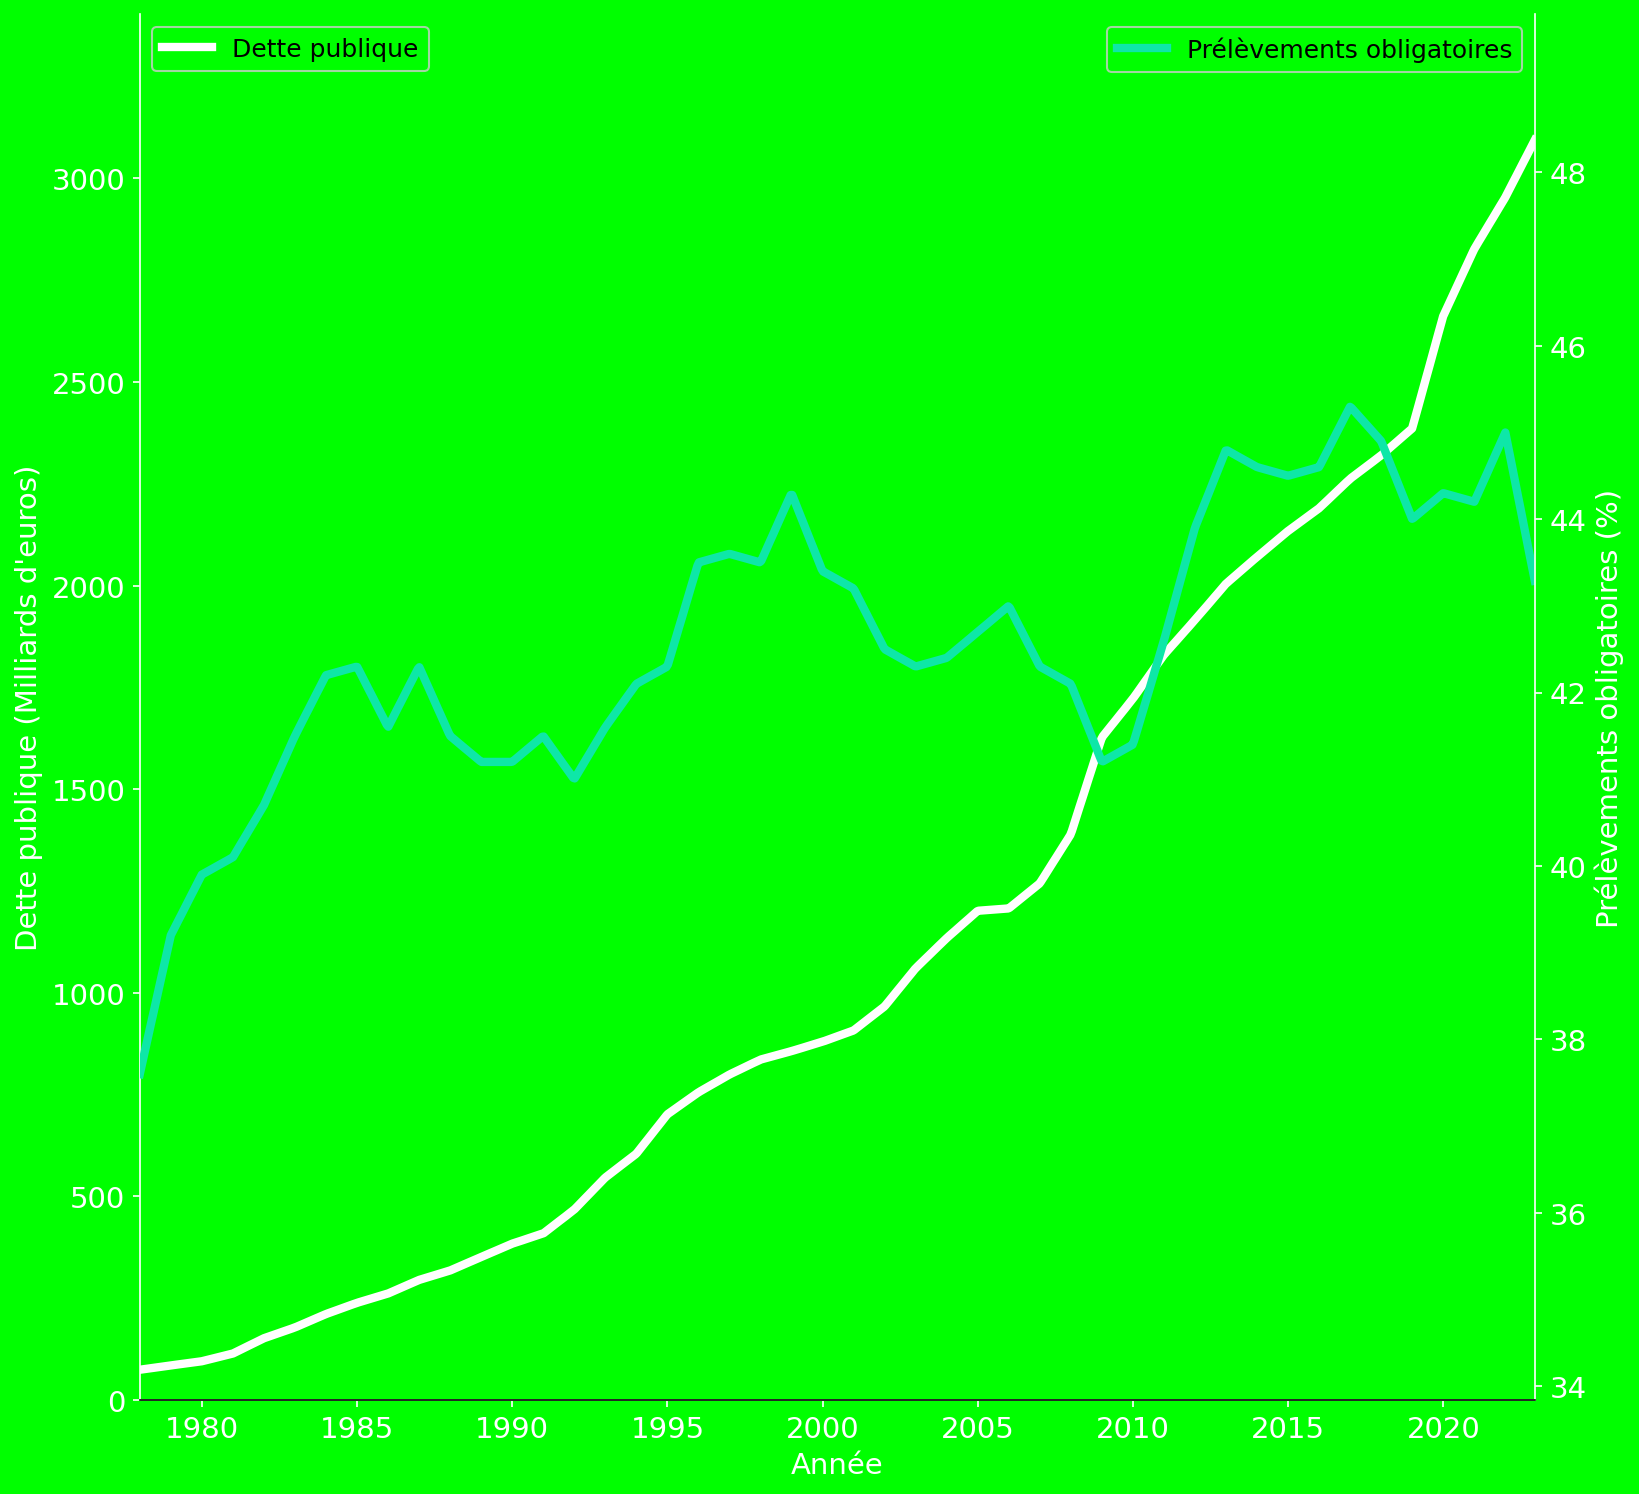

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Données sur la dette publique et les prélèvements obligatoires
data_debt_tax = {
    'Année': [1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
              1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
              2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Dette publique (Milliards d\'euros)': [74.5, 85.1, 95.3, 114.3, 151.8, 178.3, 211.2, 238.8, 261.7, 295.0, 318.2,
                                            351.3, 384.1, 409.0, 467.7, 546.5, 605.0, 701.6, 755.6, 799.4, 836.1, 856.9,
                                            880.0, 907.7, 966.8, 1060.4, 1134.3, 1201.5, 1207.3, 1268.9, 1389.4, 1627.2,
                                            1722.2, 1830.1, 1915.8, 2004.7, 2070.6, 2134.1, 2190.0, 2262.4, 2319.8,
                                            2386.1, 2662.1, 2826.7, 2953.6, 3101.4],
    'Prélèvements obligatoires (%)': [37.6, 39.2, 39.9, 40.1, 40.7, 41.5, 42.2, 42.3, 41.6, 42.3, 41.5, 41.2, 41.2,
                                      41.5, 41.0, 41.6, 42.1, 42.3, 43.5, 43.6, 43.5, 44.3, 43.4, 43.2, 42.5, 42.3,
                                      42.4, 42.7, 43.0, 42.3, 42.1, 41.2, 41.4, 42.6, 43.9, 44.8, 44.6, 44.5, 44.6,
                                      45.3, 44.9, 44.0, 44.3, 44.2, 45.0, 43.2]
}

# Convertir l'année en datetime pour la dette publique
df_debt_tax = pd.DataFrame(data_debt_tax)
df_debt_tax['Date'] = pd.to_datetime(df_debt_tax['Année'].astype(str) + '-01-01')
x_data_debt_tax = df_debt_tax['Date'].values.astype('datetime64[D]')

# Nombre total de frames pour une animation de 15 secondes à 60 images par seconde
total_frames = 15 * 60

# Interpoler les données pour obtenir plus de frames
time_interp = np.linspace(0, len(x_data_debt_tax) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data_debt_tax)), x_data_debt_tax.astype(np.int64)).astype('datetime64[D]')
y_interp_debt = np.interp(time_interp, np.arange(len(df_debt_tax)), df_debt_tax['Dette publique (Milliards d\'euros)'])
y_interp_tax = np.interp(time_interp, np.arange(len(df_debt_tax)), df_debt_tax['Prélèvements obligatoires (%)'])

# Créer la figure et les axes avec une résolution élevée pour éviter la pixellisation
fig, ax1 = plt.subplots(figsize=(12, 12), dpi=150)  # Adapter la taille et la résolution de la figure

# Créer un deuxième axe pour les prélèvements obligatoires
ax2 = ax1.twinx()

# Couleur de fond verte pour la figure et les axes
fig.patch.set_facecolor('#00FF00')
ax1.set_facecolor('#00FF00')
ax2.set_facecolor('#00FF00')

# Supprimer les cadres supérieur et droit pour ax1
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Supprimer les cadres supérieur et gauche pour ax2
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Configurer l'axe des x pour afficher uniquement les années tous les 5 ans
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs plus vives
color_debt = 'white'  # Gold
color_tax = '#0EE7A8'   # Dodger Blue

# Définir la couleur des axes et des étiquettes en blanc pour ax1
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.tick_params(axis='x', colors='white', labelsize=14)
ax1.tick_params(axis='y', colors='white', labelsize=14)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Définir la couleur des axes et des étiquettes en blanc pour ax2
ax2.spines['right'].set_color('white')
ax2.tick_params(axis='y', colors='white', labelsize=14)
ax2.yaxis.label.set_color('white')

# Créer les lignes de données pour la dette publique et les prélèvements obligatoires
line_debt, = ax1.plot([], [], label='Dette publique', lw=4, color=color_debt, zorder=1)
line_tax, = ax2.plot([], [], label='Prélèvements obligatoires', lw=4, color=color_tax, zorder=1)

# Initialiser la fonction pour la configuration de l'animation
def init():
    line_debt.set_data([], [])
    line_tax.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(3652, 'D'))  # Ajuster la limite droite de l'axe des x
    ax1.set_ylim(0, max(df_debt_tax['Dette publique (Milliards d\'euros)']) * 1.1)
    ax2.set_ylim(min(df_debt_tax['Prélèvements obligatoires (%)']) * 0.9, max(df_debt_tax['Prélèvements obligatoires (%)']) * 1.1)
    ax1.set_xlabel('Année', fontsize=14)
    ax1.set_ylabel('Dette publique (Milliards d\'euros)', fontsize=14, color='white')
    ax2.set_ylabel('Prélèvements obligatoires (%)', fontsize=14, color='white')
    ax1.legend(loc='upper left', fontsize=12, facecolor='#00FF00')
    ax2.legend(loc='upper right', fontsize=12, facecolor='#00FF00')
    return line_debt, line_tax,

# Fonction pour mettre à jour l'animation
def update(frame):
    # Mise à jour des données des lignes
    line_debt.set_data(x_interp[:frame], y_interp_debt[:frame])
    line_tax.set_data(x_interp[:frame], y_interp_tax[:frame])

    # Mise à jour des limites des axes si la séquence n'est pas vide
    if frame > 0:
        # Ajuster les limites des y-axes
        ax1.set_ylim(0, max(y_interp_debt[:frame]) * 1.1)
        ax2.set_ylim(min(y_interp_tax[:frame]) * 0.9, max(y_interp_tax[:frame]) * 1.1)

        # Ajuster les limites de l'axe des x pour dézoomer progressivement
        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames))

        # Effacer les annotations précédentes
        for ann in ax1.texts + ax2.texts:
            ann.remove()

        # Ajouter les annotations pour les points actuels
        ax1.annotate(f"{y_interp_debt[frame]:.1f} Md€", (x_interp[frame], y_interp_debt[frame]),
                     textcoords="offset points", xytext=(10,10), ha='center', color=color_debt, fontsize=8)
        ax2.annotate(f"{y_interp_tax[frame]:.1f} %", (x_interp[frame], y_interp_tax[frame]),
                     textcoords="offset points", xytext=(10,10), ha='center', color=color_tax, fontsize=8)

    return line_debt, line_tax,

# Créer l'animation avec 60 images par seconde (interval=1000/60 millisecondes)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Enregistrer l'animation en tant que fichier vidéo
ani.save('debt_tax_animation.mp4', writer='ffmpeg')

# Afficher l'animation dans le notebook
HTML('<video controls src="debt_tax_animation.mp4" type="video/mp4">')


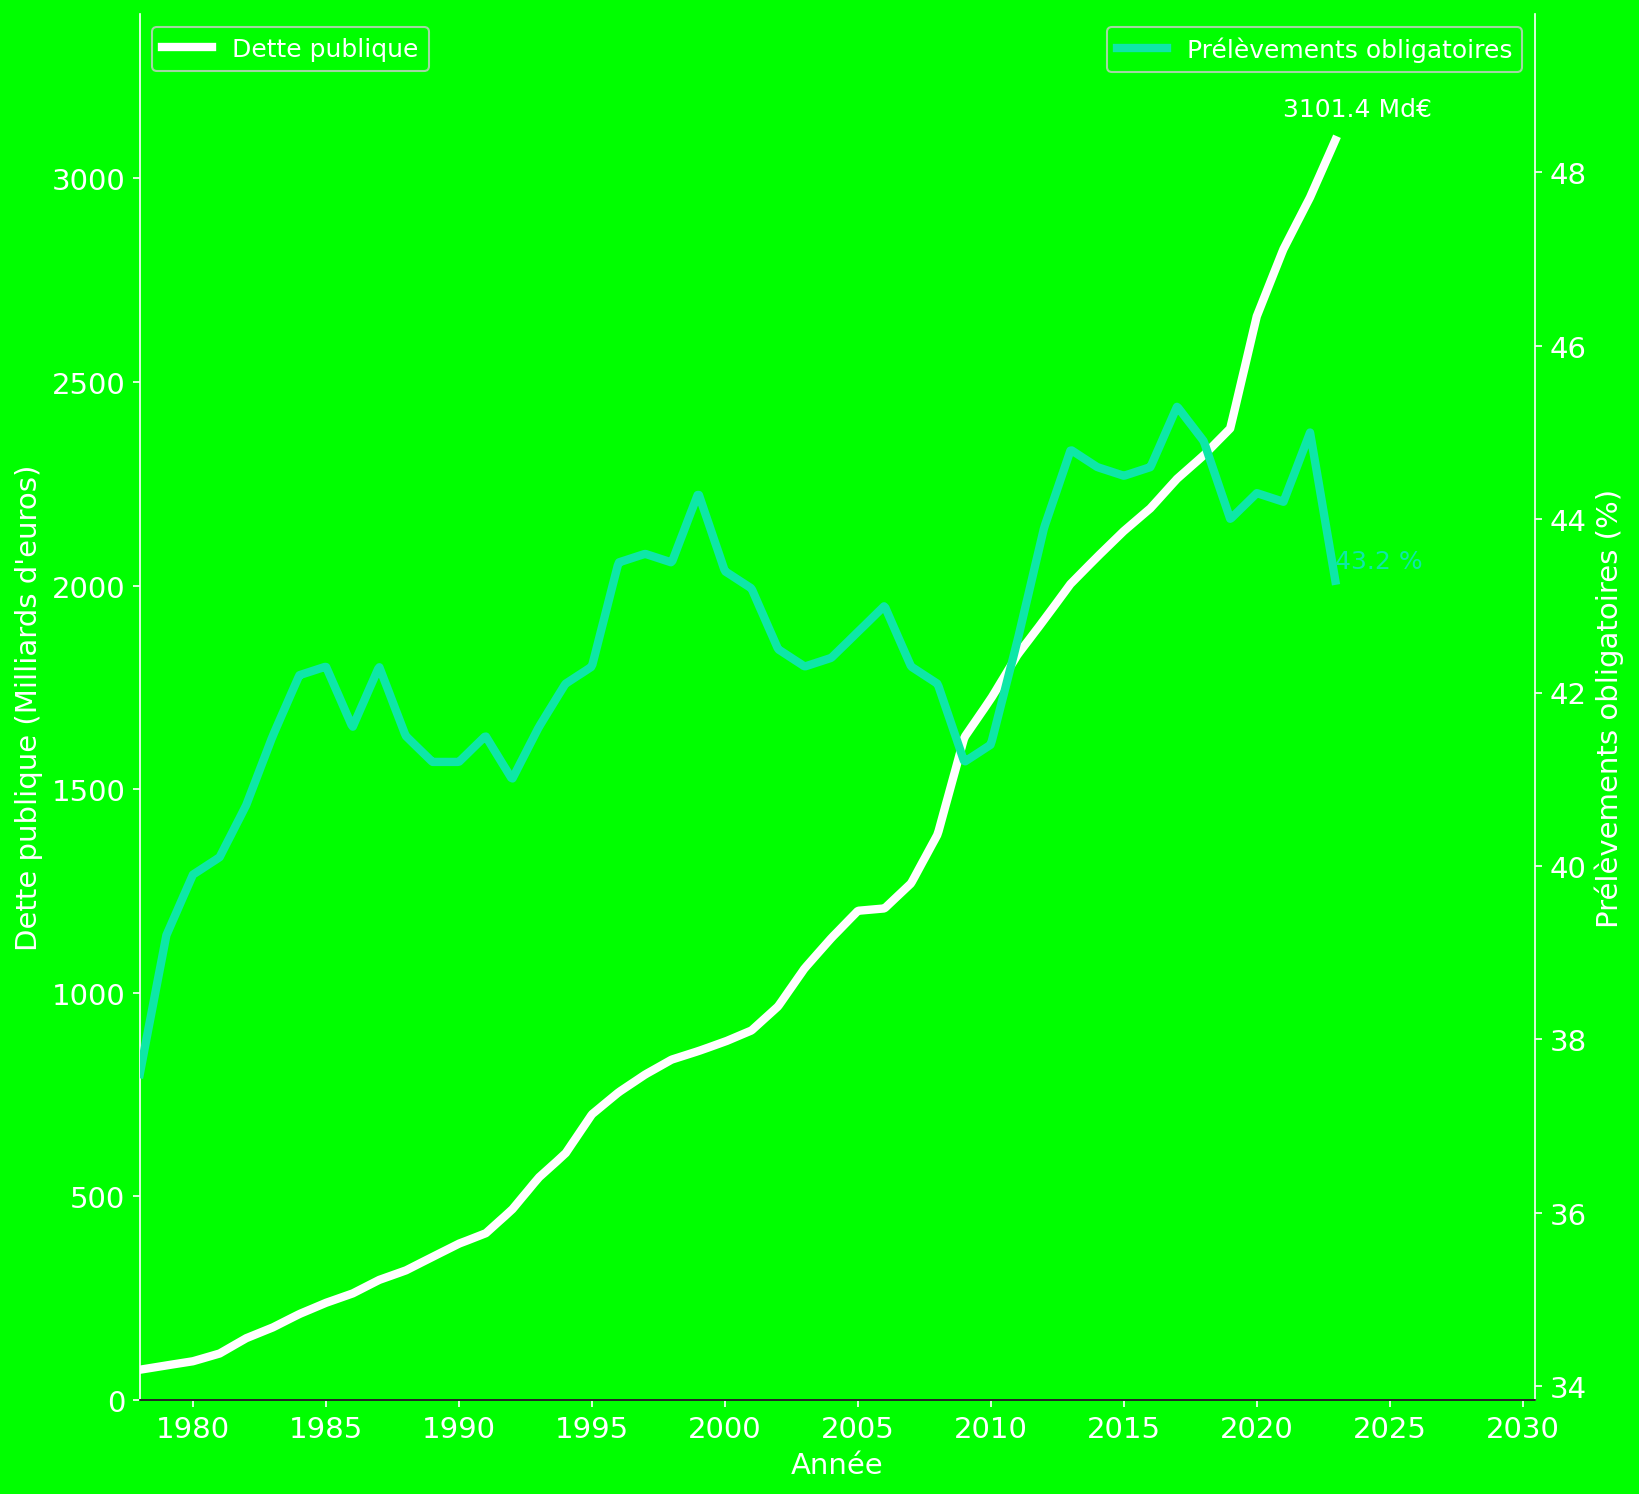

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Données sur la dette publique et les prélèvements obligatoires
data_debt_tax = {
    'Année': [1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
              1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
              2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Dette publique (Milliards d\'euros)': [74.5, 85.1, 95.3, 114.3, 151.8, 178.3, 211.2, 238.8, 261.7, 295.0, 318.2,
                                            351.3, 384.1, 409.0, 467.7, 546.5, 605.0, 701.6, 755.6, 799.4, 836.1, 856.9,
                                            880.0, 907.7, 966.8, 1060.4, 1134.3, 1201.5, 1207.3, 1268.9, 1389.4, 1627.2,
                                            1722.2, 1830.1, 1915.8, 2004.7, 2070.6, 2134.1, 2190.0, 2262.4, 2319.8,
                                            2386.1, 2662.1, 2826.7, 2953.6, 3101.4],
    'Prélèvements obligatoires (%)': [37.6, 39.2, 39.9, 40.1, 40.7, 41.5, 42.2, 42.3, 41.6, 42.3, 41.5, 41.2, 41.2,
                                      41.5, 41.0, 41.6, 42.1, 42.3, 43.5, 43.6, 43.5, 44.3, 43.4, 43.2, 42.5, 42.3,
                                      42.4, 42.7, 43.0, 42.3, 42.1, 41.2, 41.4, 42.6, 43.9, 44.8, 44.6, 44.5, 44.6,
                                      45.3, 44.9, 44.0, 44.3, 44.2, 45.0, 43.2]
}

# Convertir l'année en datetime pour la dette publique
df_debt_tax = pd.DataFrame(data_debt_tax)
df_debt_tax['Date'] = pd.to_datetime(df_debt_tax['Année'].astype(str) + '-01-01')
x_data_debt_tax = df_debt_tax['Date'].values.astype('datetime64[D]')

# Nombre total de frames pour une animation de 15 secondes à 60 images par seconde
total_frames = 15 * 60

# Interpoler les données pour obtenir plus de frames
time_interp = np.linspace(0, len(x_data_debt_tax) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data_debt_tax)), x_data_debt_tax.astype(np.int64)).astype('datetime64[D]')
y_interp_debt = np.interp(time_interp, np.arange(len(df_debt_tax)), df_debt_tax['Dette publique (Milliards d\'euros)'])
y_interp_tax = np.interp(time_interp, np.arange(len(df_debt_tax)), df_debt_tax['Prélèvements obligatoires (%)'])

# Créer la figure et les axes avec une résolution élevée pour éviter la pixellisation
fig, ax1 = plt.subplots(figsize=(12, 12), dpi=150)  # Adapter la taille et la résolution de la figure

# Créer un deuxième axe pour les prélèvements obligatoires
ax2 = ax1.twinx()

# Couleur de fond verte pour la figure et les axes
fig.patch.set_facecolor('#00FF00')
ax1.set_facecolor('#00FF00')
ax2.set_facecolor('#00FF00')

# Supprimer les cadres supérieur et droit pour ax1
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Supprimer les cadres supérieur et gauche pour ax2
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Configurer l'axe des x pour afficher uniquement les années tous les 5 ans
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs plus vives
color_debt = 'white'  # Gold
color_tax = '#0EE7A8'   # Dodger Blue

# Définir la couleur des axes et des étiquettes en blanc pour ax1
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.tick_params(axis='x', colors='white', labelsize=14)
ax1.tick_params(axis='y', colors='white', labelsize=14)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Définir la couleur des axes et des étiquettes en blanc pour ax2
ax2.spines['right'].set_color('white')
ax2.tick_params(axis='y', colors='white', labelsize=14)
ax2.yaxis.label.set_color('white')

# Créer les lignes de données pour la dette publique et les prélèvements obligatoires
line_debt, = ax1.plot([], [], label='Dette publique', lw=4, color=color_debt, zorder=1)  # Épaissir les traits
line_tax, = ax2.plot([], [], label='Prélèvements obligatoires', lw=4, color=color_tax, zorder=1)  # Épaissir les traits

# Initialiser la fonction pour la configuration de l'animation
def init():
    line_debt.set_data([], [])
    line_tax.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(3652, 'D') * 1.5)  # Ajuster la limite droite de l'axe des x avec moins d'espace
    ax1.set_ylim(0, max(df_debt_tax['Dette publique (Milliards d\'euros)']) * 1.1)
    ax2.set_ylim(min(df_debt_tax['Prélèvements obligatoires (%)']) * 0.9, max(df_debt_tax['Prélèvements obligatoires (%)']) * 1.1)
    ax1.set_xlabel('Année', fontsize=14)
    ax1.set_ylabel('Dette publique (Milliards d\'euros)', fontsize=14, color='white')
    ax2.set_ylabel('Prélèvements obligatoires (%)', fontsize=14, color='white')
    ax1.legend(loc='upper left', fontsize=12, facecolor='#00FF00', labelcolor='white')  # Légende en blanc
    ax2.legend(loc='upper right', fontsize=12, facecolor='#00FF00', labelcolor='white')  # Légende en blanc
    return line_debt, line_tax,

# Fonction pour mettre à jour l'animation
def update(frame):
    # Mise à jour des données des lignes
    line_debt.set_data(x_interp[:frame], y_interp_debt[:frame])
    line_tax.set_data(x_interp[:frame], y_interp_tax[:frame])

    # Mise à jour des limites des axes si la séquence n'est pas vide
    if frame > 0:
        # Ajuster les limites des y-axes
        ax1.set_ylim(0, max(y_interp_debt[:frame]) * 1.1)
        ax2.set_ylim(min(y_interp_tax[:frame]) * 0.9, max(y_interp_tax[:frame]) * 1.1)

        # Ajuster les limites de l'axe des x pour dézoomer progressivement avec moins d'espace à droite
        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 0.75)

        # Effacer les annotations précédentes
        for ann in ax1.texts + ax2.texts:
            ann.remove()

        # Ajouter les annotations pour les points actuels avec une police plus grande
        ax1.annotate(f"{y_interp_debt[frame]:.1f} Md€", (x_interp[frame], y_interp_debt[frame]),
                     textcoords="offset points", xytext=(10,10), ha='center', color=color_debt, fontsize=12)  # Taille de police augmentée
        ax2.annotate(f"{y_interp_tax[frame]:.1f} %", (x_interp[frame], y_interp_tax[frame]),
                     textcoords="offset points", xytext=(20,10), ha='center', color=color_tax, fontsize=12)  # Taille de police augmentée et décalage ajusté

    return line_debt, line_tax,

# Créer l'animation avec 60 images par seconde (interval=1000/60 millisecondes)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Enregistrer l'animation en tant que fichier vidéo
ani.save('debt_tax_animation.mp4', writer='ffmpeg')

# Afficher l'animation dans le notebook
HTML('<video controls src="debt_tax_animation.mp4" type="video/mp4">')


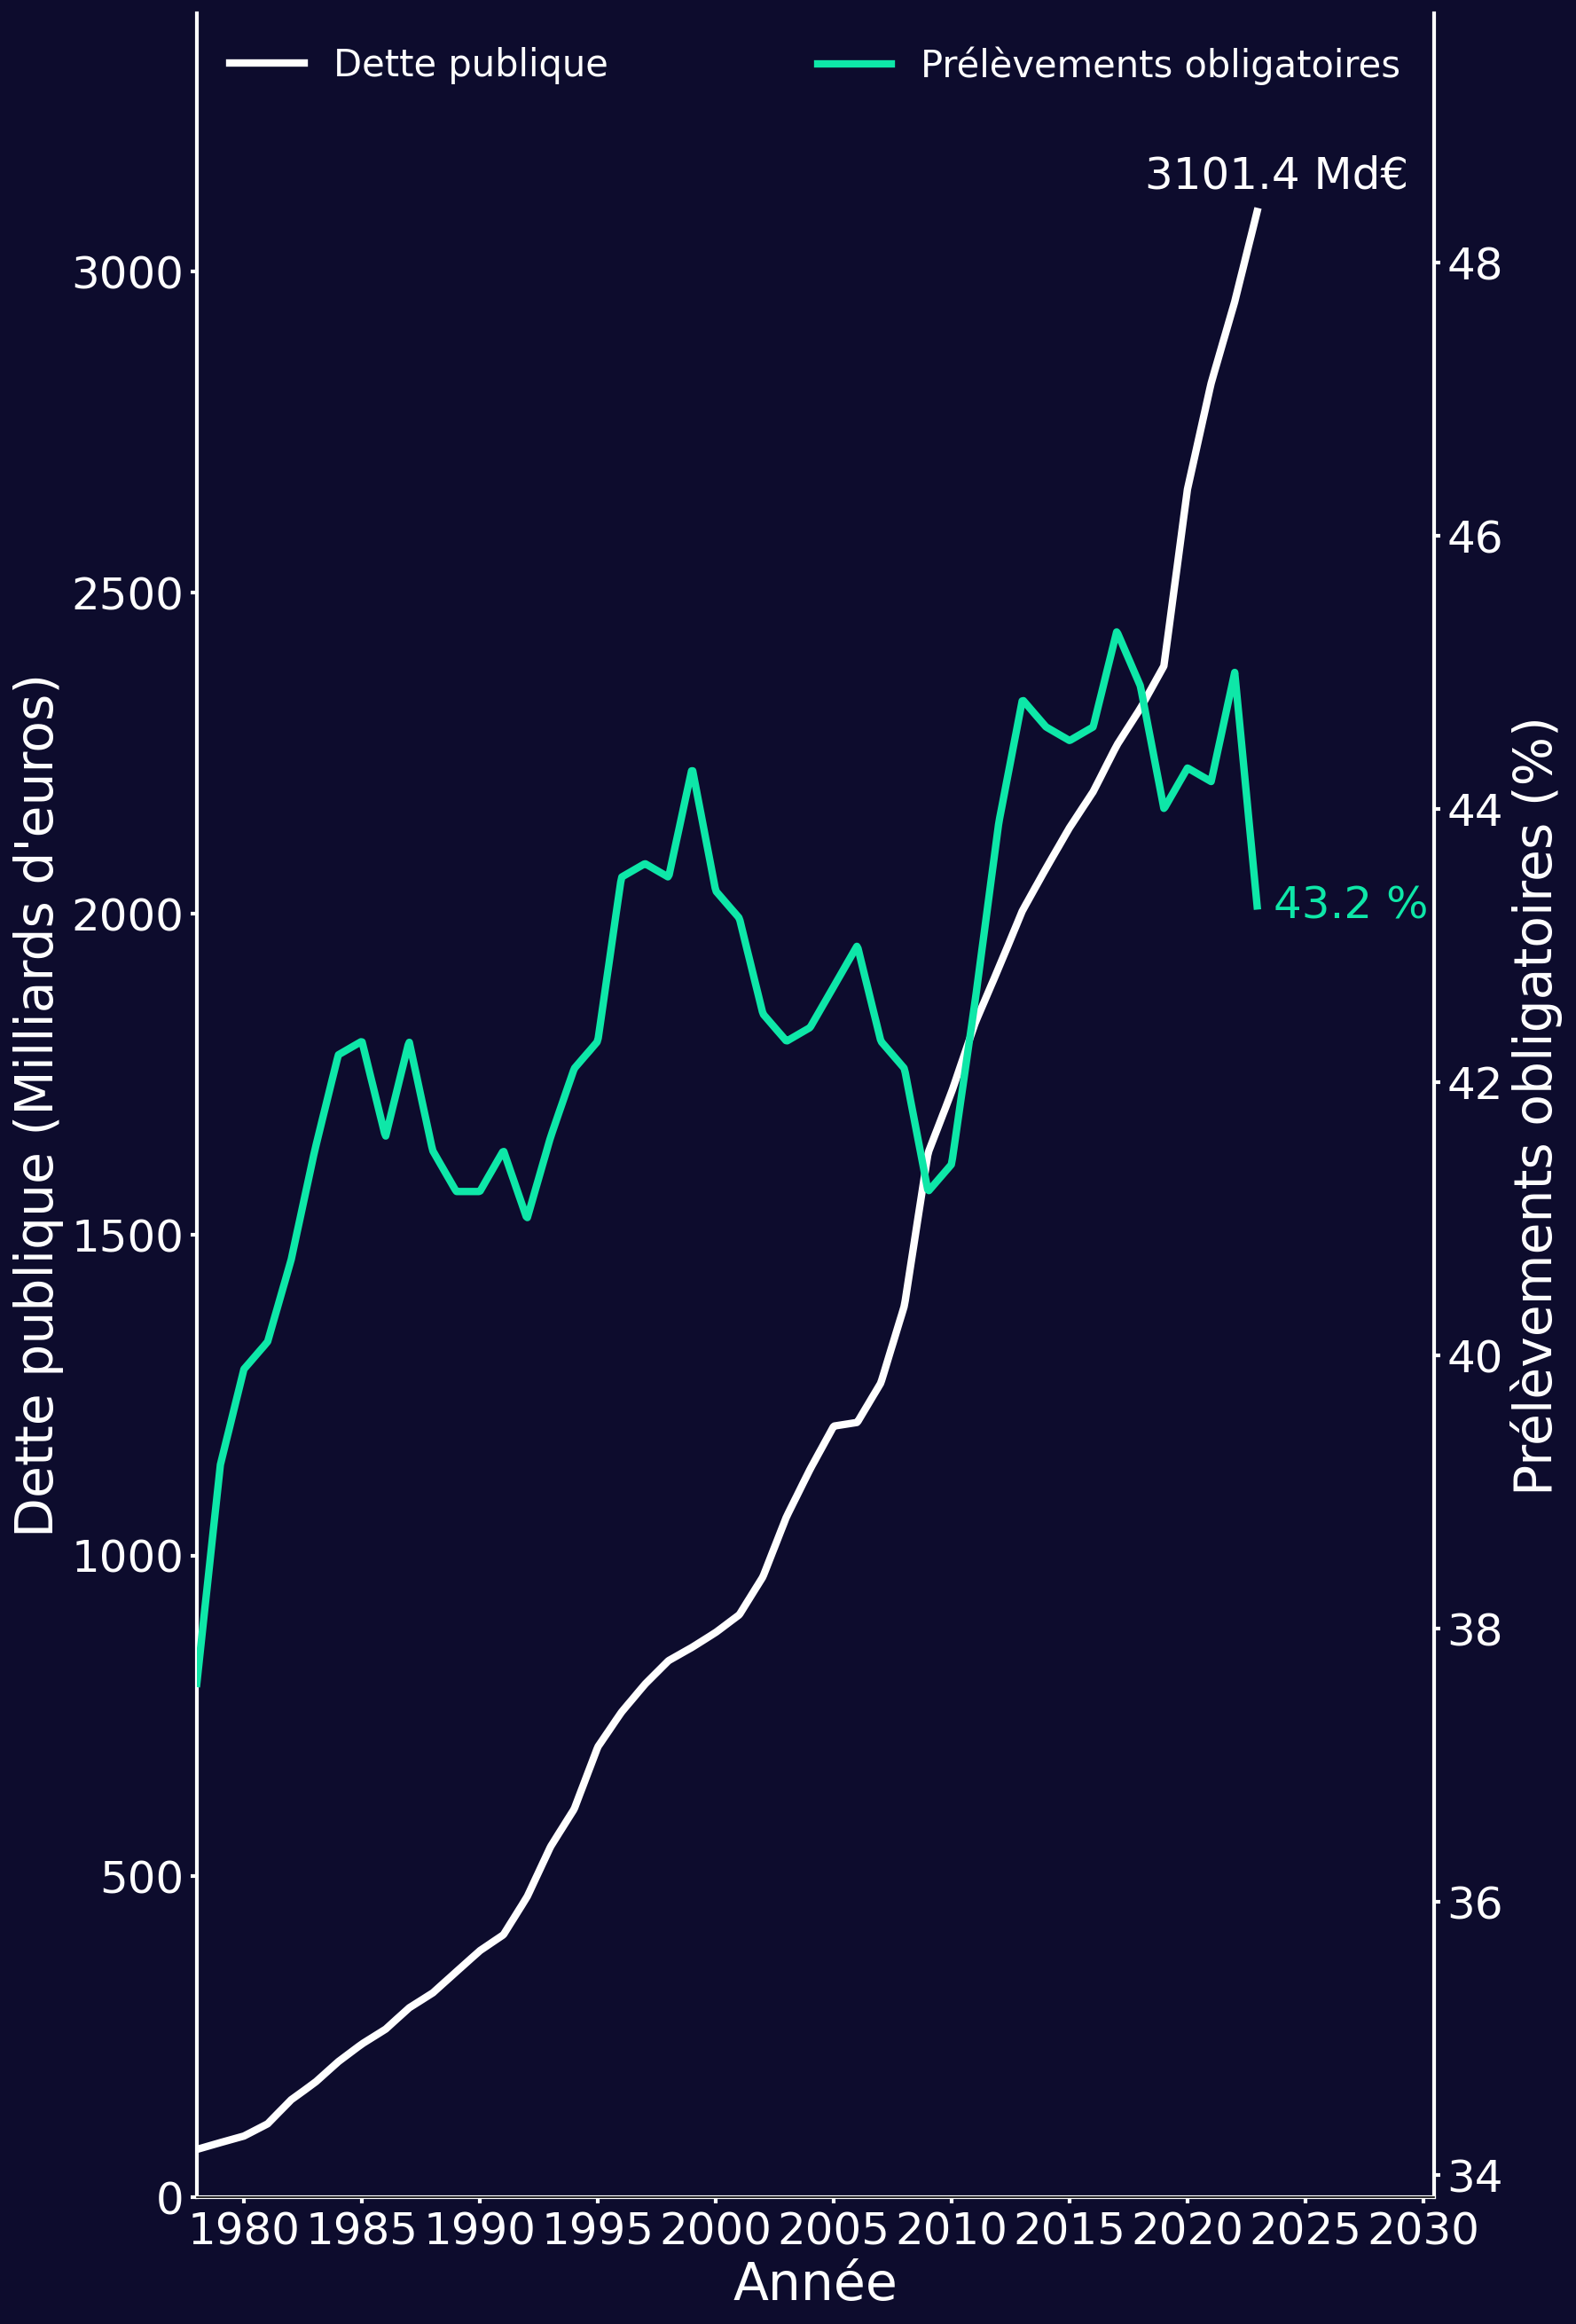

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Données sur la dette publique et les prélèvements obligatoires
data_debt_tax = {
    'Année': [1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
              1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
              2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Dette publique (Milliards d\'euros)': [74.5, 85.1, 95.3, 114.3, 151.8, 178.3, 211.2, 238.8, 261.7, 295.0, 318.2,
                                            351.3, 384.1, 409.0, 467.7, 546.5, 605.0, 701.6, 755.6, 799.4, 836.1, 856.9,
                                            880.0, 907.7, 966.8, 1060.4, 1134.3, 1201.5, 1207.3, 1268.9, 1389.4, 1627.2,
                                            1722.2, 1830.1, 1915.8, 2004.7, 2070.6, 2134.1, 2190.0, 2262.4, 2319.8,
                                            2386.1, 2662.1, 2826.7, 2953.6, 3101.4],
    'Prélèvements obligatoires (%)': [37.6, 39.2, 39.9, 40.1, 40.7, 41.5, 42.2, 42.3, 41.6, 42.3, 41.5, 41.2, 41.2,
                                      41.5, 41.0, 41.6, 42.1, 42.3, 43.5, 43.6, 43.5, 44.3, 43.4, 43.2, 42.5, 42.3,
                                      42.4, 42.7, 43.0, 42.3, 42.1, 41.2, 41.4, 42.6, 43.9, 44.8, 44.6, 44.5, 44.6,
                                      45.3, 44.9, 44.0, 44.3, 44.2, 45.0, 43.2]
}

# Convertir l'année en datetime pour la dette publique
df_debt_tax = pd.DataFrame(data_debt_tax)
df_debt_tax['Date'] = pd.to_datetime(df_debt_tax['Année'].astype(str) + '-01-01')
x_data_debt_tax = df_debt_tax['Date'].values.astype('datetime64[D]')

# Nombre total de frames pour une animation de 15 secondes à 60 images par seconde
total_frames = 15 * 60

# Interpoler les données pour obtenir plus de frames
time_interp = np.linspace(0, len(x_data_debt_tax) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data_debt_tax)), x_data_debt_tax.astype(np.int64)).astype('datetime64[D]')
y_interp_debt = np.interp(time_interp, np.arange(len(df_debt_tax)), df_debt_tax['Dette publique (Milliards d\'euros)'])
y_interp_tax = np.interp(time_interp, np.arange(len(df_debt_tax)), df_debt_tax['Prélèvements obligatoires (%)'])

# Créer la figure et les axes avec une résolution élevée pour éviter la pixellisation
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)  # Adapter la taille et la résolution de la figure

# Créer un deuxième axe pour les prélèvements obligatoires
ax2 = ax1.twinx()

# Couleur de fond
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')
ax2.set_facecolor('#0D0C2D')

# Supprimer les cadres supérieur et droit pour ax1
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Supprimer les cadres supérieur et gauche pour ax2
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Configurer l'axe des x pour afficher uniquement les années tous les 5 ans
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs des lignes
color_debt = 'white'  # Blanc
color_tax = '#0EE7A8'  # Vert

# Définir la couleur des axes et des étiquettes en blanc pour ax1 et ax2, et épaissir les axes
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.tick_params(axis='x', colors='white', labelsize=24, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=24, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

ax2.spines['right'].set_color('white')
ax2.spines['right'].set_linewidth(2)
ax2.tick_params(axis='y', colors='white', labelsize=24, width=2)
ax2.yaxis.label.set_color('white')

# Créer les lignes de données pour la dette publique et les prélèvements obligatoires
line_debt, = ax1.plot([], [], label='Dette publique', lw=4, color=color_debt, zorder=1)
line_tax, = ax2.plot([], [], label='Prélèvements obligatoires', lw=4, color=color_tax, zorder=1)

# Initialiser la fonction pour la configuration de l'animation
def init():
    line_debt.set_data([], [])
    line_tax.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(3652, 'D') * 1.5)
    ax1.set_ylim(0, max(df_debt_tax['Dette publique (Milliards d\'euros)']) * 1.1)
    ax2.set_ylim(min(df_debt_tax['Prélèvements obligatoires (%)']) * 0.9, max(df_debt_tax['Prélèvements obligatoires (%)']) * 1.1)
    ax1.set_xlabel('Année', fontsize=28)
    ax1.set_ylabel('Dette publique (Milliards d\'euros)', fontsize=28, color='white')
    ax2.set_ylabel('Prélèvements obligatoires (%)', fontsize=28, color='white')
    ax1.legend(loc='upper left', fontsize=20, facecolor='#0D0C2D', labelcolor='white', frameon=False, handlelength=2)
    ax2.legend(loc='upper right', fontsize=20, facecolor='#0D0C2D', labelcolor='white', frameon=False, handlelength=2)
    return line_debt, line_tax

# Fonction pour mettre à jour l'animation
def update(frame):
    # Mise à jour des données des lignes
    line_debt.set_data(x_interp[:frame], y_interp_debt[:frame])
    line_tax.set_data(x_interp[:frame], y_interp_tax[:frame])

    # Mise à jour des limites des axes si la séquence n'est pas vide
    if frame > 0:
        ax1.set_ylim(0, max(y_interp_debt[:frame]) * 1.1)
        ax2.set_ylim(min(y_interp_tax[:frame]) * 0.9, max(y_interp_tax[:frame]) * 1.1)
        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 0.75)

        for ann in ax1.texts + ax2.texts:
            ann.remove()

        ax1.annotate(f"{y_interp_debt[frame]:.1f} Md€", (x_interp[frame], y_interp_debt[frame]),
                     textcoords="offset points", xytext=(10, 10), ha='center', color=color_debt, fontsize=24)
        ax2.annotate(f"{y_interp_tax[frame]:.1f} %", (x_interp[frame], y_interp_tax[frame]),
                     textcoords="offset points", xytext=(50, 0), ha='center', color=color_tax, fontsize=24)

    return line_debt, line_tax

# Créer l'animation avec 60 images par seconde (interval=1000/60 millisecondes)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Enregistrer l'animation en tant que fichier vidéo
ani.save('debt_tax_animation.mp4', writer='ffmpeg')

# Afficher l'animation dans le notebook
HTML('<video controls src="debt_tax_animation.mp4" type="video/mp4">')
